# Data Journalism
## Practical Python exercise: Merging and aggregating

*Damian Trilling and Penny Sheets*

This notebook outlines thew

- (3) Enrichment
- (4) Analysis

of two CBS datasets. We made a different notebook that helps you reconstructing how we
die the 

- (1) Retrieval
- (2) Preprocessing

to construct the files for this examples.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
population=pd.read_json('population.json')
economy=pd.read_json('economy.json')

# Your Task

- use methods like `.head()`, `.describe()` and/or `.value_counts()` to get a sense of both datasets.
- what are the common characteristics between the datasets, what are the differences?

In [3]:
# your code here

In [4]:
population.head()

,Regions,Periods,LiveBornChildren_2,NetMigrationExcludingAdministrative_19
0,Groningen,1960,8868.0,-1748.0
1,Groningen,1961,9062.0,-1087.0
10,Groningen,1970,9774.0,196.0
100,Friesland,2002,7987.0,2339.0
101,Friesland,2003,7932.0,1196.0


In [5]:
economy.head()

,Regions,Periods,GDPVolumeChanges_1
0,Groningen,1996,9.3
1,Groningen,1997,-2.0
10,Groningen,2006,1.1
100,Flevoland,2008,-0.8
101,Flevoland,2009,-5.4


In [6]:
population['Periods'].value_counts()

2017    12
1974    12
1986    12
1985    12
1984    12
1983    12
1982    12
1981    12
1980    12
1979    12
1978    12
1977    12
1976    12
1975    12
1973    12
2016    12
1972    12
1971    12
1970    12
1969    12
1968    12
1967    12
1966    12
1965    12
1964    12
1963    12
1962    12
1961    12
1987    12
1988    12
1989    12
1990    12
2015    12
2014    12
2013    12
2012    12
2011    12
2010    12
2009    12
2008    12
2007    12
2006    12
2005    12
2004    12
2003    12
2002    12
2001    12
2000    12
1999    12
1998    12
1997    12
1996    12
1995    12
1994    12
1993    12
1992    12
1991    12
1960    12
Name: Periods, dtype: int64

In [7]:
population.describe()

,Periods,LiveBornChildren_2,NetMigrationExcludingAdministrative_19
count,696.000000,670.000000,670.000000
mean,1988.500000,17076.928358,3086.132836
std,16.752708,12387.755648,5049.005650
min,1960.000000,3357.000000,-15648.000000
25%,1974.000000,6511.250000,272.000000
50%,1988.500000,13359.000000,1784.500000
75%,2003.000000,26237.250000,4970.750000
max,2017.000000,55295.000000,31545.000000


In [8]:
economy['Regions'].value_counts().sort_index()

Drenthe          22
Flevoland        22
Friesland        22
Gelderland       22
Groningen        22
Limburg          22
Noord-Brabant    22
Noord-Holland    22
Overijssel       22
Utrecht          22
Zeeland          22
Zuid-Holland     22
Name: Regions, dtype: int64

# Discuss: What type of join?
Discuss with your neighbor
- what type of join (inner, outer, left, right) you want; and
- which column(s) to join on

Then, create a combined dataframe with a command along the lines of

```
df = population.merge(economy, on='columnname'], how='left/right/inner/outer')
```
or if you have multiple columns to join on:
```
df = population.merge(economy, on=['columnname','columnname'], how='left/right/inner/outer')
```



In [9]:
df = economy.merge(population, on= ['Periods', 'Regions'], how='left')

In [10]:
df

,Regions,Periods,GDPVolumeChanges_1,LiveBornChildren_2,NetMigrationExcludingAdministrative_19
0,Groningen,1996,9.3,6148.0,-336.0
1,Groningen,1997,-2.0,6336.0,-647.0
2,Groningen,2006,1.1,5838.0,65.0
3,Flevoland,2008,-0.8,5101.0,1984.0
4,Flevoland,2009,-5.4,5292.0,1519.0
5,Flevoland,2010,3.2,5310.0,1359.0
6,Flevoland,2011,2.0,5090.0,1162.0
7,Flevoland,2012,-1.0,4991.0,339.0
8,Flevoland,2013,-2.6,4687.0,-234.0
9,Flevoland,2014,3.0,4922.0,-685.0


Then, give some information about the resulting dataframe.

In [11]:
# your code here

In [12]:
df.describe()

,Periods,GDPVolumeChanges_1,LiveBornChildren_2,NetMigrationExcludingAdministrative_19
count,264.000000,264.000000,264.000000,264.000000
mean,2006.500000,1.954924,15572.280303,4499.102273
std,6.356339,2.875221,11710.891211,5658.304660
min,1996.000000,-8.300000,3439.000000,-2831.000000
25%,2001.000000,0.300000,5582.000000,863.750000
50%,2006.500000,2.250000,12096.000000,2407.000000
75%,2012.000000,3.525000,24250.000000,6343.250000
max,2017.000000,11.400000,44022.000000,31545.000000


In [13]:
df

,Regions,Periods,GDPVolumeChanges_1,LiveBornChildren_2,NetMigrationExcludingAdministrative_19
0,Groningen,1996,9.3,6148.0,-336.0
1,Groningen,1997,-2.0,6336.0,-647.0
2,Groningen,2006,1.1,5838.0,65.0
3,Flevoland,2008,-0.8,5101.0,1984.0
4,Flevoland,2009,-5.4,5292.0,1519.0
5,Flevoland,2010,3.2,5310.0,1359.0
6,Flevoland,2011,2.0,5090.0,1162.0
7,Flevoland,2012,-1.0,4991.0,339.0
8,Flevoland,2013,-2.6,4687.0,-234.0
9,Flevoland,2014,3.0,4922.0,-685.0


## Setting an index
While our columns have a descriptive names (headers), our rows don't right now. They are just numbers. However, we could actually give them *meaningful* names. A nice side-effect is that you will get better plots, with meaningful axis labels later on.

In [14]:
df.index=df['Periods']

See the difference?

In [15]:
df.head()

,Regions,Periods,GDPVolumeChanges_1,LiveBornChildren_2,NetMigrationExcludingAdministrative_19
Periods,,,,,
1996,Groningen,1996,9.3,6148.0,-336.0
1997,Groningen,1997,-2.0,6336.0,-647.0
2006,Groningen,2006,1.1,5838.0,65.0
2008,Flevoland,2008,-0.8,5101.0,1984.0
2009,Flevoland,2009,-5.4,5292.0,1519.0


## Analyze the data

Let's train a bit with  `.groupby()` and `.agg()`.

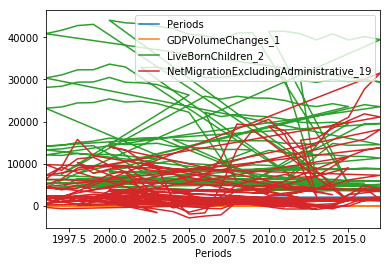

In [16]:
df.plot()

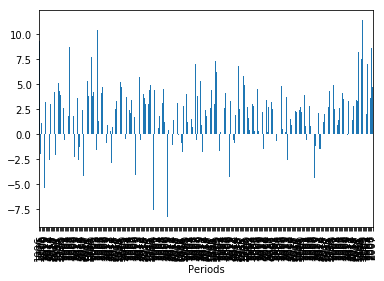

In [17]:
df['GDPVolumeChanges_1'].plot(kind='bar')

## Discuss: Why does the above not work?

OK, got it?

Let's try this instead:

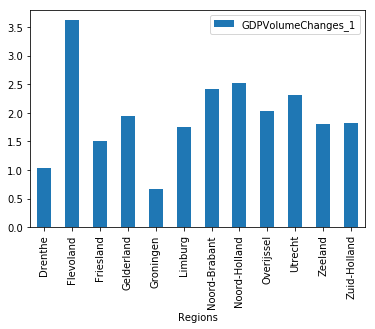

In [18]:
df[['GDPVolumeChanges_1','Regions']].groupby(
    'Regions').agg(np.mean).plot(kind='bar')

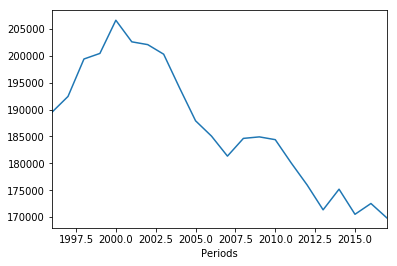

In [19]:
df['LiveBornChildren_2'].groupby('Periods').agg(sum).plot()

## Discuss: which aggregation function?

- Why did we choose `np.mean`?
- What function should we choose for analyzing `df['LiveBornChildren_2']`? Why?



### Some more example code for plotting, feel free to play around

Pay attention to what works well and what doesn't, and how you can use

- groupby and/or
- subsetting

to make plots clearer.

Regions
Drenthe          AxesSubplot(0.125,0.125;0.775x0.755)
Flevoland        AxesSubplot(0.125,0.125;0.775x0.755)
Friesland        AxesSubplot(0.125,0.125;0.775x0.755)
Gelderland       AxesSubplot(0.125,0.125;0.775x0.755)
Groningen        AxesSubplot(0.125,0.125;0.775x0.755)
Limburg          AxesSubplot(0.125,0.125;0.775x0.755)
Noord-Brabant    AxesSubplot(0.125,0.125;0.775x0.755)
Noord-Holland    AxesSubplot(0.125,0.125;0.775x0.755)
Overijssel       AxesSubplot(0.125,0.125;0.775x0.755)
Utrecht          AxesSubplot(0.125,0.125;0.775x0.755)
Zeeland          AxesSubplot(0.125,0.125;0.775x0.755)
Zuid-Holland     AxesSubplot(0.125,0.125;0.775x0.755)
Name: GDPVolumeChanges_1, dtype: object

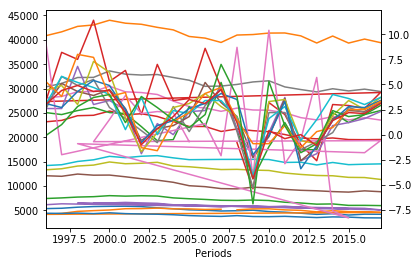

In [20]:
df.groupby('Regions')['LiveBornChildren_2'].plot()
df.groupby('Regions')['GDPVolumeChanges_1'].plot(secondary_y=True)

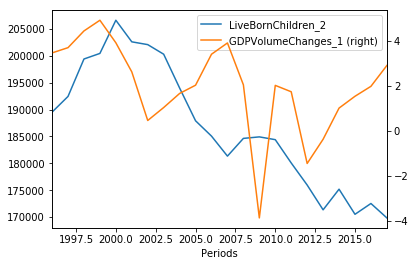

In [21]:
df.groupby(df.index)['LiveBornChildren_2'].agg(sum).plot(legend = True)
df.groupby(df.index)['GDPVolumeChanges_1'].agg(np.mean).plot(legend=True, secondary_y=True)

Regions
Drenthe          AxesSubplot(0.125,0.125;0.775x0.755)
Flevoland        AxesSubplot(0.125,0.125;0.775x0.755)
Friesland        AxesSubplot(0.125,0.125;0.775x0.755)
Gelderland       AxesSubplot(0.125,0.125;0.775x0.755)
Groningen        AxesSubplot(0.125,0.125;0.775x0.755)
Limburg          AxesSubplot(0.125,0.125;0.775x0.755)
Noord-Brabant    AxesSubplot(0.125,0.125;0.775x0.755)
Noord-Holland    AxesSubplot(0.125,0.125;0.775x0.755)
Overijssel       AxesSubplot(0.125,0.125;0.775x0.755)
Utrecht          AxesSubplot(0.125,0.125;0.775x0.755)
Zeeland          AxesSubplot(0.125,0.125;0.775x0.755)
Zuid-Holland     AxesSubplot(0.125,0.125;0.775x0.755)
Name: NetMigrationExcludingAdministrative_19, dtype: object

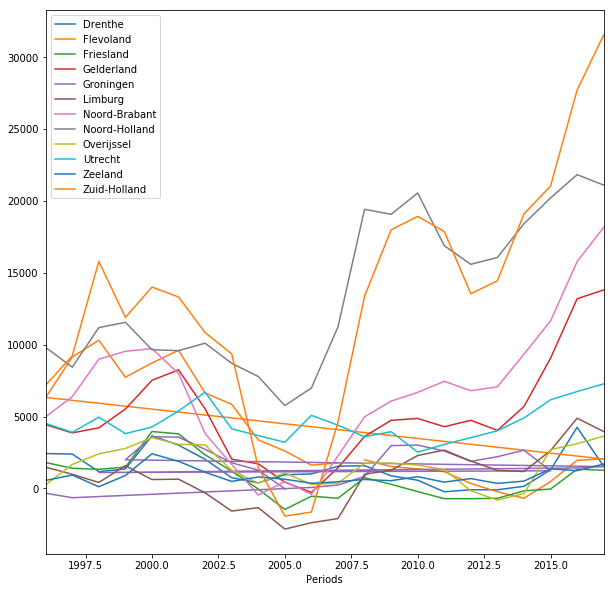

In [22]:
df.groupby('Regions')['NetMigrationExcludingAdministrative_19'].plot(legend=True, figsize = [10,10] )

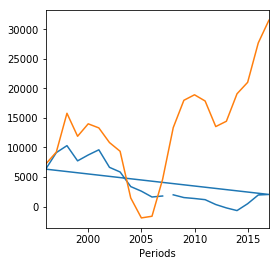

In [23]:
df[df['Regions']=='Flevoland']['NetMigrationExcludingAdministrative_19'].plot(legend=False, figsize = [4,4] )
df[df['Regions']=='Zuid-Holland']['NetMigrationExcludingAdministrative_19'].plot(legend=False )

In [24]:
df['Regions']=='Flevoland'

Periods
1996    False
1997    False
2006    False
2008     True
2009     True
2010     True
2011     True
2012     True
2013     True
2014     True
2015     True
2016     True
2017     True
2007    False
1996    False
1997    False
1998    False
1999    False
2000    False
2001    False
2002    False
2003    False
2004    False
2005    False
2008    False
2006    False
2007    False
2008    False
2009    False
2010    False
        ...  
2002    False
2003    False
2004    False
2005    False
2006    False
2007    False
2008    False
2009    False
2004    False
2010    False
2011    False
2012    False
2013    False
2014    False
2015    False
2016    False
2017    False
1996     True
1997     True
2005    False
1998     True
1999     True
2000     True
2001     True
2002     True
2003     True
2004     True
2005     True
2006     True
2007     True
Name: Regions, Length: 264, dtype: bool

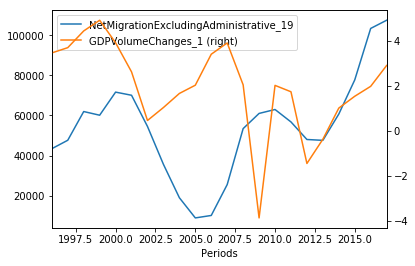

In [25]:
df.groupby(df.index)['NetMigrationExcludingAdministrative_19'].agg(sum).plot(legend = True)
df.groupby(df.index)['GDPVolumeChanges_1'].agg(np.mean).plot(legend=True, secondary_y=True)

### Discuss
I personally find this last plot a pretty cool one. Do you agree?

In [26]:
df[['NetMigrationExcludingAdministrative_19','GDPVolumeChanges_1']].corr() # we probably should have lagged one of the variables by a year or so for this.

,NetMigrationExcludingAdministrative_19,GDPVolumeChanges_1
NetMigrationExcludingAdministrative_19,1.000000,0.108005
GDPVolumeChanges_1,0.108005,1.000000


## Correlational analysis

We could also look into some bivariate plots.... 

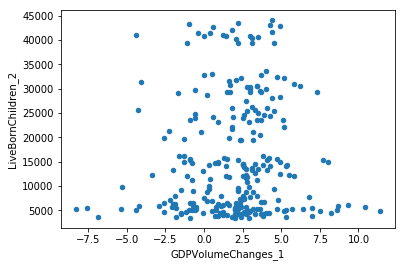

In [27]:
df.plot(y='LiveBornChildren_2', x='GDPVolumeChanges_1', kind='scatter')

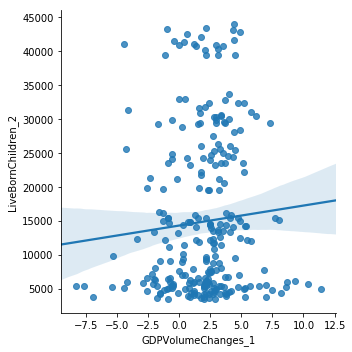

In [28]:
sns.lmplot(y='LiveBornChildren_2', x='GDPVolumeChanges_1', data=df,
           fit_reg=True, lowess=False, robust=True) 